In [55]:

# Caso Práctico (VC_Practica_02_Caras). Ejemplo de Detección de Caras por ordenador
# Práctica de visión por computador con OpenCV y Python
# [OpenCV](http://opencv.org/releases.html) debe estar instalado

# OpenCV contiene clasificadores entrenados para detectar caras
# Los ficheros XML con los clasificadores entrenados se encuentran en el directorio `opencv/data /`.
# Para detección de caras existen dos clasificadores entrenados:

# 1. Clasificador Haar Cascade
# 2. Clasificador LBP Cascade


In [56]:
# Importar librerías
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time


In [57]:
# Definir una función para convertir a color RGB
def convertToRGB(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


In [58]:
# Cargar el clasificador entrenado "Haar Cascade" desde el fichero XML
haar_face_cascade = cv2.CascadeClassifier(
    'data/haarcascade_frontalface_alt.xml')


In [59]:
# Cargar una imagen de test
test1 = cv2.imread('data/test1.jpg')
# Convertir la imagen de test a escala de grises. El detector de caras espera una imagen de este tipo
gray_img = cv2.cvtColor(test1, cv2.COLOR_BGR2GRAY)


In [60]:
# Visualizar la imagen con OpenCV
cv2.imshow('Imagen de Test', gray_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


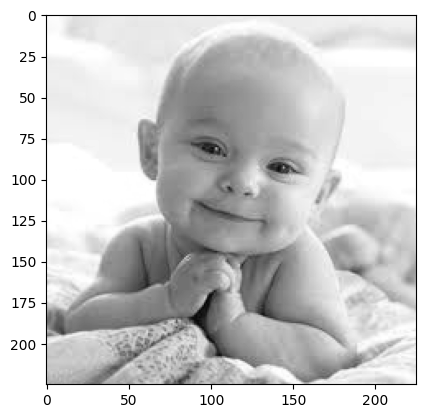

In [61]:
# Visualizar la imagen con matplotlib
plt.imshow(gray_img, cmap='gray')
plt.show()


In [62]:
# Buscar las caras en la imagen y devolver las posiciones detectadas con unrectángulo(x, y, w, h)
faces = haar_face_cascade.detectMultiScale(
    gray_img, scaleFactor=1.1, minNeighbors=5)


In [63]:
# Devolver el número de caras detectadas en la imagen
print('Caras encontradas: ', len(faces))


Caras encontradas:  1


In [64]:
# Registrar la información de los rectángulos de las caras
for (x, y, w, h) in faces:
    cv2.rectangle(test1, (x, y), (x+w, y+h), (0, 255, 0), 2)


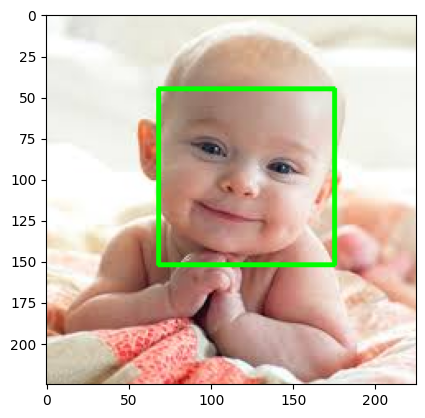

In [65]:
# Convertir la imagen a RGB y visualizarla
plt.imshow(convertToRGB(test1))
plt.show()


In [66]:
# Agrupar el código en una función para la detección de las caras
# Como argumentos de la función están el clasificador a utilizar y la imagen de entrada


def detect_faces(f_cascade, colored_img, scaleFactor=1.1):
    # Realizar una copia de la imagen
    img_copy = np.copy(colored_img)

    # Convertir la imagen de test a escala de grises. OpenCV requiere una imagen en escala de grises
    gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)

    # Detectar las caras en la imagen. Se utiliza 'detectMultiScale' ya que algunas caras pueden estar más cerca o lejos de la cámara
    faces = f_cascade.detectMultiScale(
        gray, scaleFactor=scaleFactor, minNeighbors=5)

    # Dibujar los rectángulos en la imagen original
    for (x, y, w, h) in faces:
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)

    return img_copy


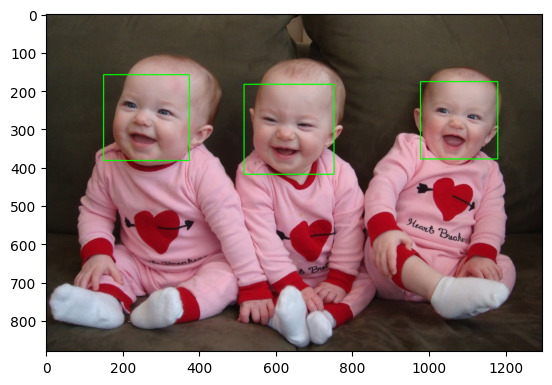

In [67]:
# Cargar otra imagen de test
test2 = cv2.imread('data/test3.jpg')
# Llamar a la función para detectar caras
faces_detected_img = detect_faces(haar_face_cascade, test2)
# Convertir la imagen a RGB y visualizar la imagen
plt.imshow(convertToRGB(faces_detected_img))


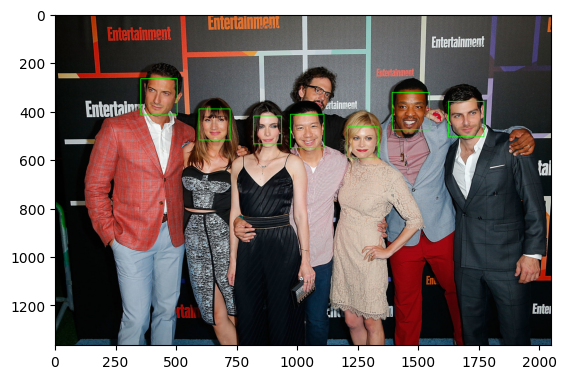

In [68]:
# Cargar otra imagen de test
test2 = cv2.imread('data/test4.jpg')

# Llamar a la función para detectar caras
faces_detected_img = detect_faces(haar_face_cascade, test2)

# Convertir la imagen a RGB y visualizar la imagen
plt.imshow(convertToRGB(faces_detected_img))
plt.show()


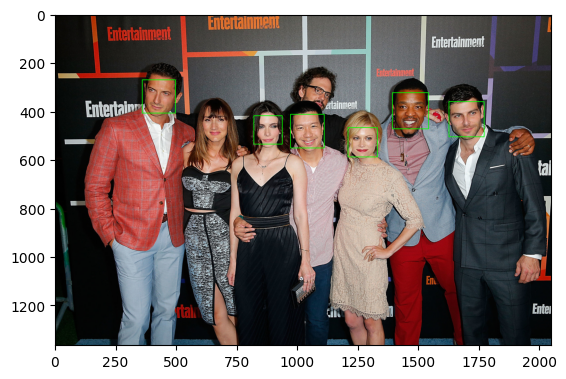

In [69]:
# En este caso se detectan falsos positivos (FP)
# Volvemos a realizar la detección modificando el valor de escala

# Volver a cargar la imagen
test2 = cv2.imread('data/test4.jpg')

# Llamar a la función para detectar caras, pero cambiando el factor de escala a 1.2
faces_detected_img = detect_faces(haar_face_cascade, test2, scaleFactor=1.2)

# Convertir la imagen a RGB y visualizar la imagen
plt.imshow(convertToRGB(faces_detected_img))
plt.show()


In [70]:
# Utilizar ahora el otro clasificador de caras (LBP Cascade)

# Cargar el clasificador entrenado "LBP Cascade" desde el fichero XML
lbp_face_cascade = cv2.CascadeClassifier('data/lbpcascade_frontalface.xml')


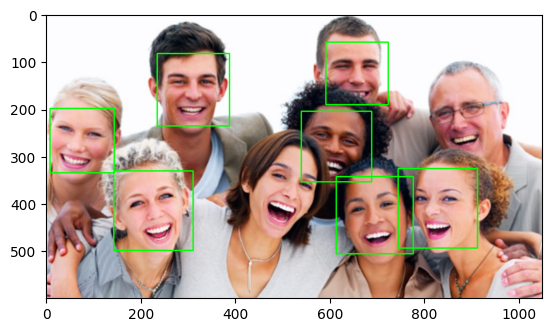

In [71]:
# Cargar una imagen de test
test2 = cv2.imread('data/test2.jpg')

# Llamar a la función para detectar caras
faces_detected_img = detect_faces(lbp_face_cascade, test2)

# Convertir la imagen a RGB y visualizar la imagen
plt.imshow(convertToRGB(faces_detected_img))
plt.show()


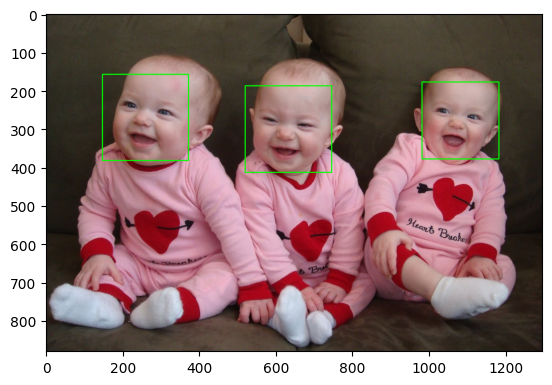

In [72]:
# Cargar otra imagen de test
test2 = cv2.imread('data/test3.jpg')

# Llamar a la función para detectar caras
faces_detected_img = detect_faces(lbp_face_cascade, test2)

# Convertir la imagen a RGB y visualizar la imagen
plt.imshow(convertToRGB(faces_detected_img))
plt.show()


In [73]:
# Ejecutar de forma conjunta los dos clasificadores Haar y LBP para ver los resultados

# Cargar el clasificador entrenado "Haar Cascade" desde el fichero XML
haar_face_cascade = cv2.CascadeClassifier(
    'data/haarcascade_frontalface_alt.xml')
# Cargar el clasificador entrenado "LBP Cascade" desde el fichero XML
lbp_face_cascade = cv2.CascadeClassifier('data/lbpcascade_frontalface.xml')


In [74]:
# Cargar la primera imagen de test conjunto
test1 = cv2.imread('data/test5.jpg')
# Cargar la segunda imagen
test2 = cv2.imread('data/test6.jpg')


In [75]:
# TEST 1
print("Test 1 de los clasificadores Haar y LBP")


Test 1 de los clasificadores Haar y LBP


In [76]:
# ------------HAAR-----------
# Registrar el tiempo antes de la detección
t1 = time.time()
# Llamar a la función para detectar caras
haar_detected_img = detect_faces(haar_face_cascade, test1)

# Registrar el tiempo después de la detección
t2 = time.time()

# Calcular la diferencia de tiempo
dt1 = t2 - t1


In [77]:
# ------------LBP-----------
# Registrar el tiempo antes de la detección
t1 = time.time()

# Llamar a la función para detectar caras
lbp_detected_img = detect_faces(lbp_face_cascade, test1)

# Registrar el tiempo después de la detección
t2 = time.time()
# Calcular la diferencia de tiempo
dt2 = t2 - t1


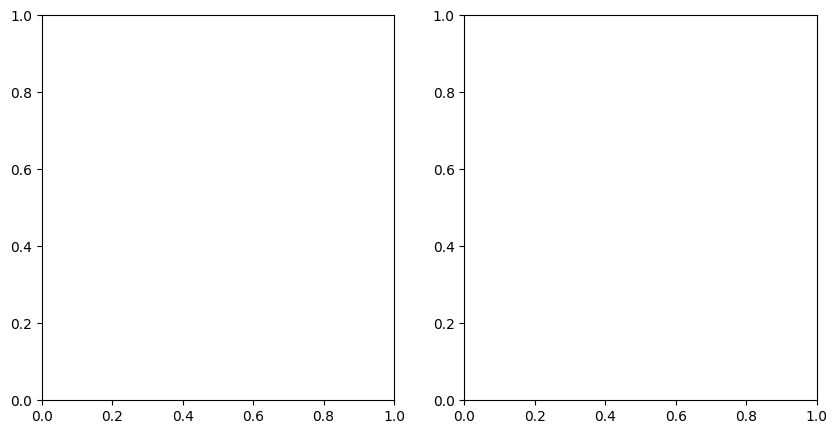

In [78]:
# Visualizar los resultados
# Crear una figura con los resultados registrados para cada clasificador
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))


In [79]:
# Visualizar resultados del clasificador Haar Cascade
ax1.set_title('Tiempo Detección Haar: ' + str(round(dt1, 3)) + ' seg')
ax1.imshow(convertToRGB(haar_detected_img))


In [80]:
# Visualizar resultados del clasificador LBP Cascade
ax2.set_title('Tiempo Detección LBP: ' + str(round(dt2, 3)) + ' seg')
ax2.imshow(convertToRGB(lbp_detected_img))


In [81]:

print("Precisión: Haar y LBP detectan igual número de caras")
print("Velocidad: LBP es más rápido que Haar\n")


Precisión: Haar y LBP detectan igual número de caras
Velocidad: LBP es más rápido que Haar



In [82]:
# Visualizar imágenes
plt.show()


In [83]:
# TEST 2
print("Test 2 de los clasificadores Haar y LBP")


Test 2 de los clasificadores Haar y LBP


In [84]:
# ------------HAAR-----------
# Registrar el tiempo antes de la detección
t1 = time.time()

# Llamar a la función para detectar caras
haar_detected_img = detect_faces(haar_face_cascade, test2)
# Registrar el tiempo después de la detección
t2 = time.time()
# Calcular la diferencia de tiempo
dt1 = t2 - t1


In [85]:
# ------------LBP-----------
# Registrar el tiempo antes de la detección
t1 = time.time()

# Llamar a la función para detectar caras
lbp_detected_img = detect_faces(lbp_face_cascade, test2)
# Registrar el tiempo después de la detección
t2 = time.time()
# Calcular la diferencia de tiempo
dt2 = t2 - t1


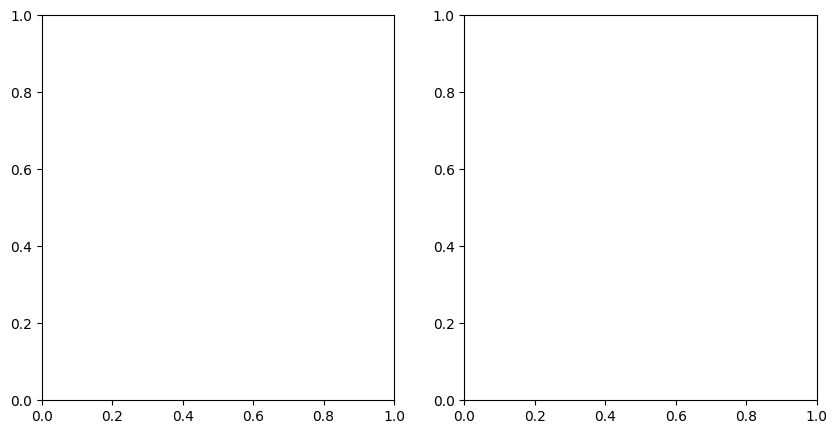

In [86]:
# Visualizar los resultados
# Crear una figura con los resultados registrados para cada clasificador
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))


In [87]:
# show Haar image
ax1.set_title('Tiempo Detección Haar: ' + str(round(dt1, 3)) + ' secs')
ax1.imshow(convertToRGB(haar_detected_img))


In [88]:
# show LBP image
ax2.set_title('Tiempo Detección LBP: ' + str(round(dt2, 3)) + ' secs')
ax2.imshow(convertToRGB(lbp_detected_img))


In [89]:
# Visualizar imágenes
plt.show()


In [90]:
print("Precisión: LBP detecta algún falso positivo")
print("Velocidad: LBP es más rápido que Haar")


Precisión: LBP detecta algún falso positivo
Velocidad: LBP es más rápido que Haar
